In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [68]:
from transport_model import Travel_Model
from networks import compose_graphs
import numpy as np
import networkx as nx
from visualization import plot_path

In [3]:
travel_model = Travel_Model()
print(travel_model.schedule.agents[56])

Travel_Agent: {pos: 77, dest: 52, unique_id: 56, travel_time: 69}


In [4]:
travel_model.run_model()
print(travel_model.schedule.agents[56])

Travel_Agent: {pos: 52, dest: 52, unique_id: 56, travel_time: 305}


In [25]:
df = travel_model.dc.get_agent_vars_dataframe()
path = df.query('AgentID == 56', engine='python')
print(path)

              travel_time  position
Step AgentID                       
0    56                69        77
1    56                94        78
2    56               107        79
3    56               109        80
4    56               137        81
5    56               143        82
6    56               157        83
7    56               160        84
8    56               180        85
9    56               184        86
10   56               193        87
11   56               203        88
12   56               232        89
13   56               242        90
14   56               266        91
15   56               287        53
16   56               305        52
17   56               305        52
18   56               305        52
19   56               305        52
20   56               305        52
21   56               305        52
22   56               305        52
23   56               305        52
24   56               305        52
25   56               305   

In [26]:
path = path['position'].as_matrix()
print(path)

[77 78 79 ..., 52 52 52]


In [33]:
path = path[0:np.argmax(path == 52)+1]
print(path)

[77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 53 52]


In [47]:
path_edges = [(path[n], path[n+1]) for n in range(len(path)-1)]

In [44]:
g = compose_graphs(travel_model.network.graphs)

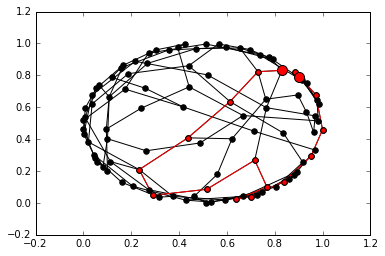

In [76]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g,pos=pos, node_color='k', node_size=30)
nx.draw_networkx_nodes(g,pos=pos, nodelist=path.tolist(), color='r', node_size=30)
nx.draw_networkx_nodes(g,pos=pos, nodelist=[path[0],path[-1]], color='r', node_size=100)
nx.draw_networkx_edges(g,pos=pos)
nx.draw_networkx_edges(g,pos=pos, edgelist=path_edges, edge_color='r')

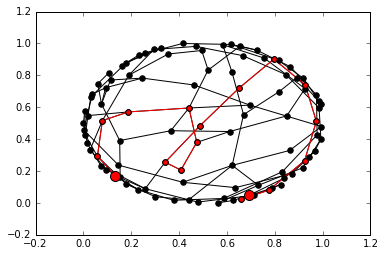

In [78]:
plot_path(travel_model, 56)